In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

from sklearn.metrics import  silhouette_score
from sklearn import datasets
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import dendrogram
from yellowbrick.cluster import SilhouetteVisualizer

import warnings
warnings.simplefilter(action='ignore')

In [2]:
data = pd.read_csv('marketing_campaign.csv', sep = '\t')

In [3]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [4]:
data.drop_duplicates(inplace = True)

In [ ]:
data.info()

In [6]:
data_new = data.copy()

In [7]:
data_new.dropna(how = 'any', inplace=True)

In [ ]:
data_new.isnull().sum()

In [9]:
data_new['Dt_Customer'] = pd.to_datetime(data_new['Dt_Customer'], format = "%d-%m-%Y")

In [10]:
data_new['Dependants'] = data_new['Kidhome'] + data_new['Teenhome']

In [11]:
data_new['Age'] = 2014 - data_new['Year_Birth']

In [12]:
data_campain = data_new[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Z_CostContact', 'Z_Revenue', 'Response']]

In [13]:
num_purchases = data_new[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]

In [14]:
data_new.drop(columns= ['ID', 'Year_Birth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 
                        'AcceptedCmp2', 'Z_CostContact', 'Z_Revenue', 'Response', 'NumDealsPurchases', 
                        'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'], inplace=True)

In [ ]:
data_new.head()

In [16]:
data_encoded = data_new.drop(columns='Dt_Customer')

In [17]:
data_encoded = pd.get_dummies(data_encoded, columns=['Education', 'Marital_Status'])

In [ ]:
data_encoded

In [ ]:
data_encoded

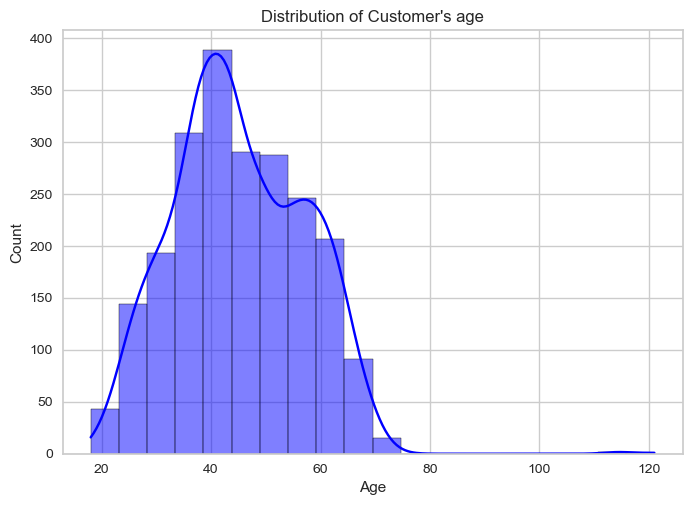

In [20]:
sns.histplot(data_new['Age'], kde=True, bins=20, color='blue')
plt.title("Distribution of Customer's age")
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

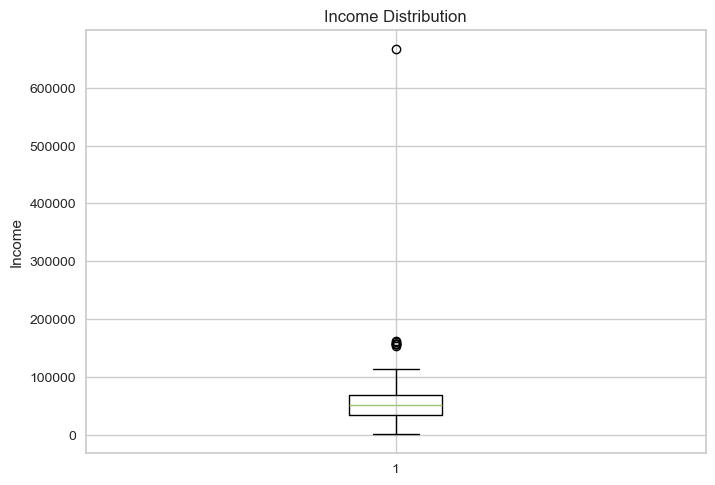

In [21]:
plt.boxplot(data_new['Income'])
plt.title('Income Distribution')
plt.ylabel('Income')
plt.show()

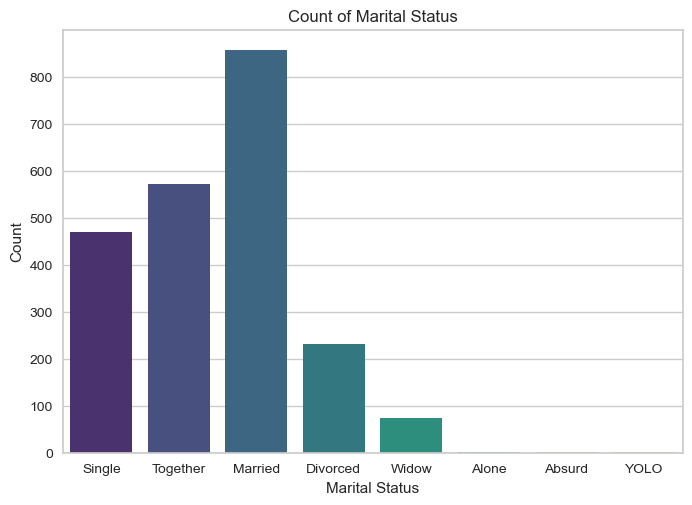

In [22]:
sns.countplot(x='Marital_Status', data=data_new, palette='viridis')
plt.title('Count of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

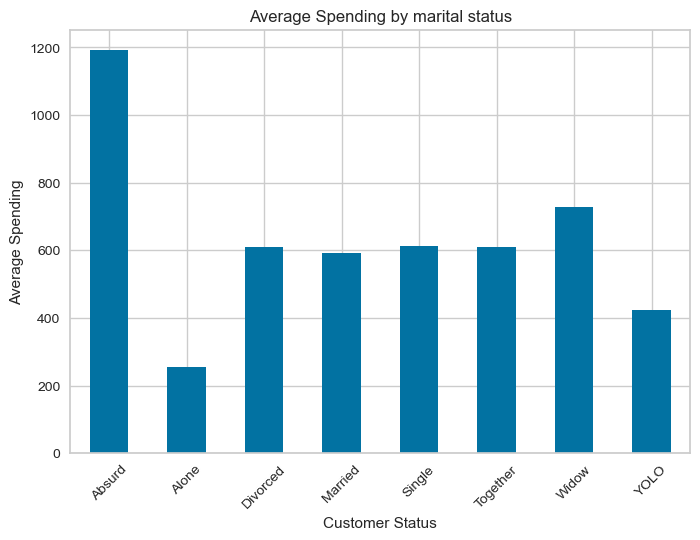

In [23]:
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
data_new['Total_Spending'] = data_new[spending_columns].sum(axis=1)

kids_spending = data_new.groupby('Marital_Status')['Total_Spending'].mean()

kids_spending.plot(kind='bar')

plt.title('Average Spending by marital status')
plt.xlabel('Customer Status')
plt.ylabel('Average Spending')
plt.xticks(rotation=45)
plt.show()

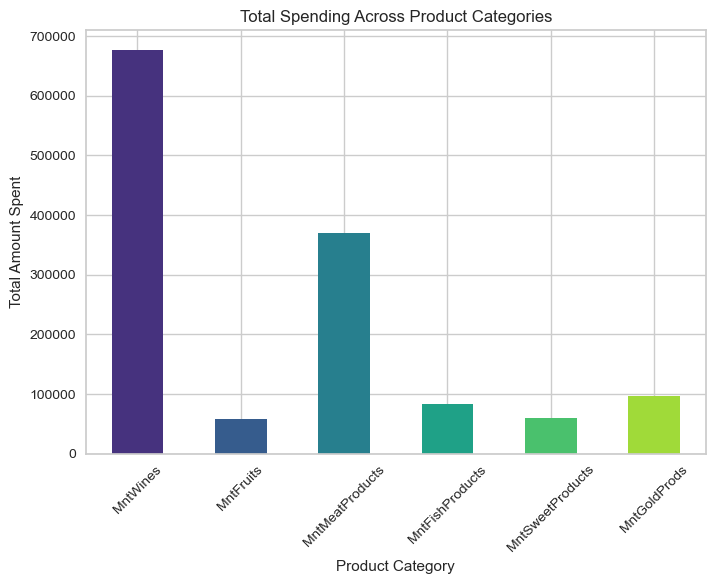

In [24]:
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
total_spending = data_new[spending_columns].sum()

total_spending.plot(kind='bar', color=sns.color_palette('viridis'))
plt.title('Total Spending Across Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=45)
plt.show()

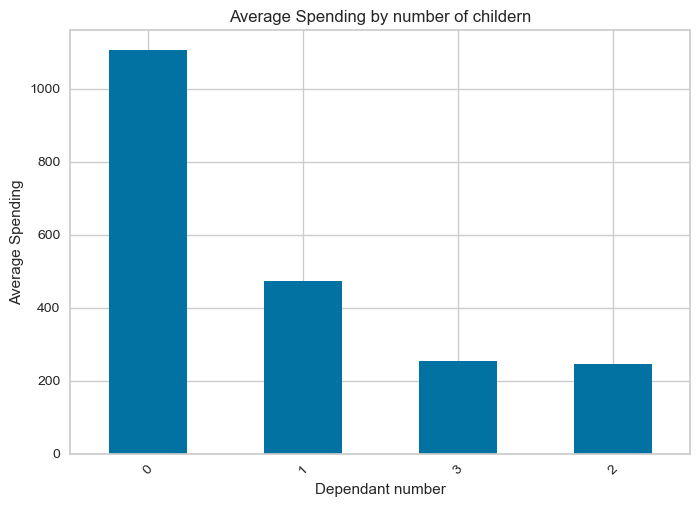

In [25]:
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
data_new['Total_Spending'] = data_new[spending_columns].sum(axis=1)

kids_spending = data_new.groupby('Dependants')['Total_Spending'].mean().sort_values(ascending=False)

kids_spending.plot(kind='bar')

plt.title('Average Spending by number of childern')
plt.xlabel('Dependant number')
plt.ylabel('Average Spending')
plt.xticks(rotation=45)
plt.show()

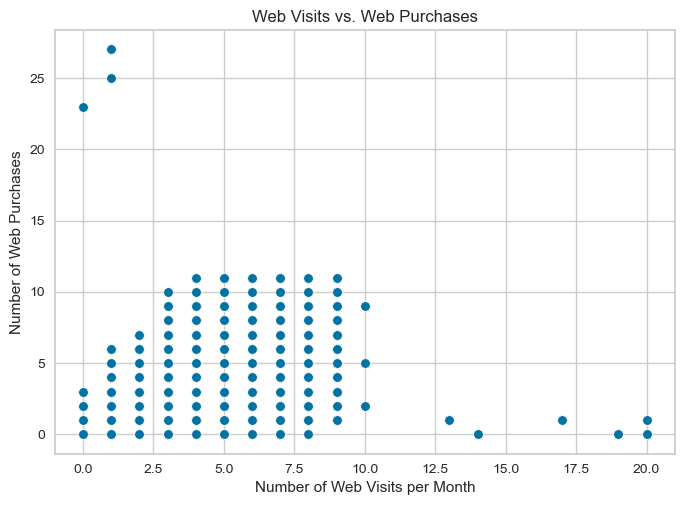

In [26]:
sns.scatterplot(x='NumWebVisitsMonth', y='NumWebPurchases', data=data)
plt.title('Web Visits vs. Web Purchases')
plt.xlabel('Number of Web Visits per Month')
plt.ylabel('Number of Web Purchases')
plt.show()

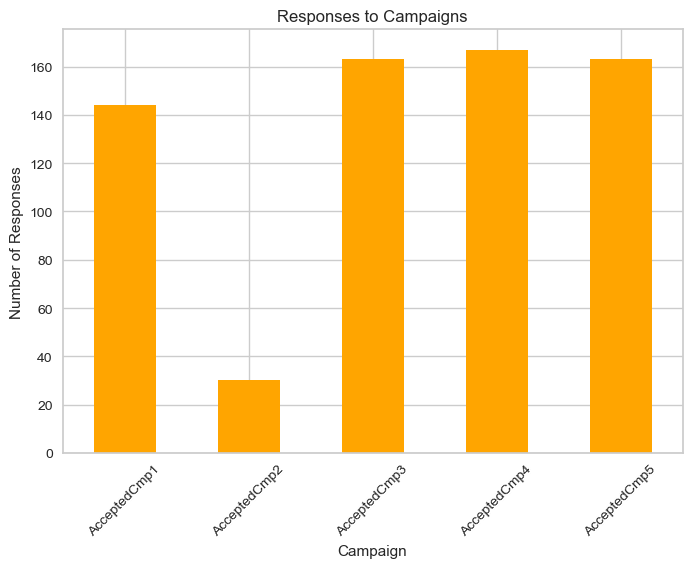

In [27]:
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
campaign_responses = data[campaign_columns].sum()

campaign_responses.plot(kind='bar', color='orange')
plt.title('Responses to Campaigns')
plt.xlabel('Campaign')
plt.ylabel('Number of Responses')
plt.xticks(rotation=45)
plt.show()

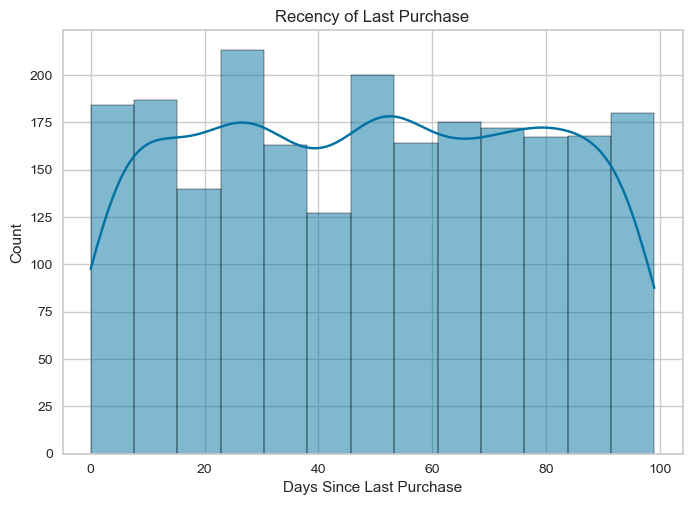

In [28]:
sns.histplot(data['Recency'], kde=True)
plt.title('Recency of Last Purchase')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Count')
plt.show()

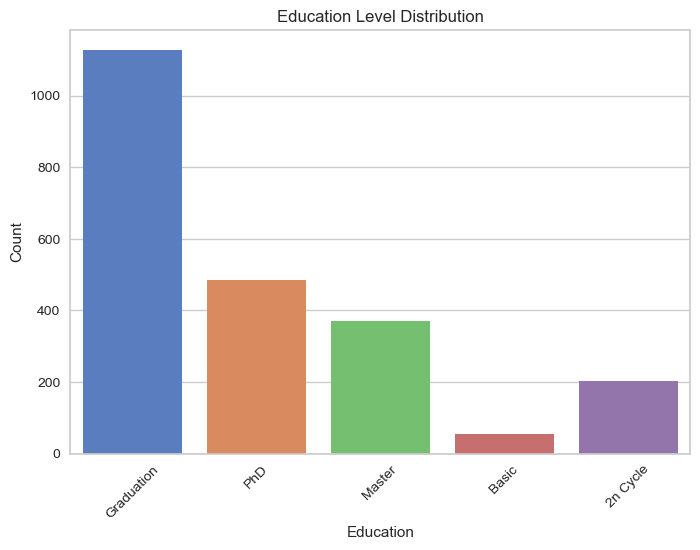

In [29]:
sns.countplot(x='Education', data=data, palette='muted')
plt.title('Education Level Distribution')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

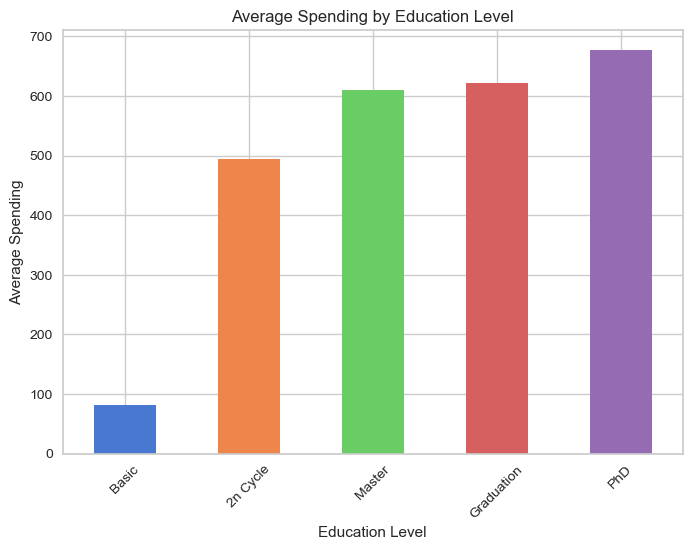

In [30]:
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
data_new['Total_Spending'] = data_new[spending_columns].sum(axis=1)

# Group by education and calculate total spending
education_spending = data_new.groupby('Education')['Total_Spending'].mean().sort_values()

# Plot the spending by education level
education_spending.plot(kind='bar', color=sns.color_palette('muted'))

plt.title('Average Spending by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Spending')
plt.xticks(rotation=45)
plt.show()